In [1]:
import os

def total_files(folder_path):
    """Counts the number of files in a given folder.

    Args:
        folder_path (str): The path to the folder.

    Returns:
        int: The number of files in the folder.
    """
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Using raw strings for file paths
train_files_healthy = r"C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Train\Healthy"
train_files_powdery = r"C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Train\Powdery"
train_files_rust = r"C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Train\Rust"

test_files_healthy = r"C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Test\Healthy"
test_files_powdery = r"C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Test\Powdery"
test_files_rust = r"C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Test\Rust"

valid_files_healthy = r"C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Validation\Healthy"
valid_files_powdery = r"C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Validation\Powdery"
valid_files_rust = r"C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Validation\Rust"

print("Number of healthy leaf images in training set:", total_files(train_files_healthy))
print("Number of powder leaf images in training set:", total_files(train_files_powdery))
print("Number of rusty leaf images in training set:", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set:", total_files(test_files_healthy))
print("Number of powder leaf images in test set:", total_files(test_files_powdery))
print("Number of rusty leaf images in test set:", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set:", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set:", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set:", total_files(valid_files_rust))


Number of healthy leaf images in training set: 458
Number of powder leaf images in training set: 430
Number of rusty leaf images in training set: 434
Number of healthy leaf images in test set: 50
Number of powder leaf images in test set: 50
Number of rusty leaf images in test set: 50
Number of healthy leaf images in validation set: 20
Number of powder leaf images in validation set: 20
Number of rusty leaf images in validation set: 20


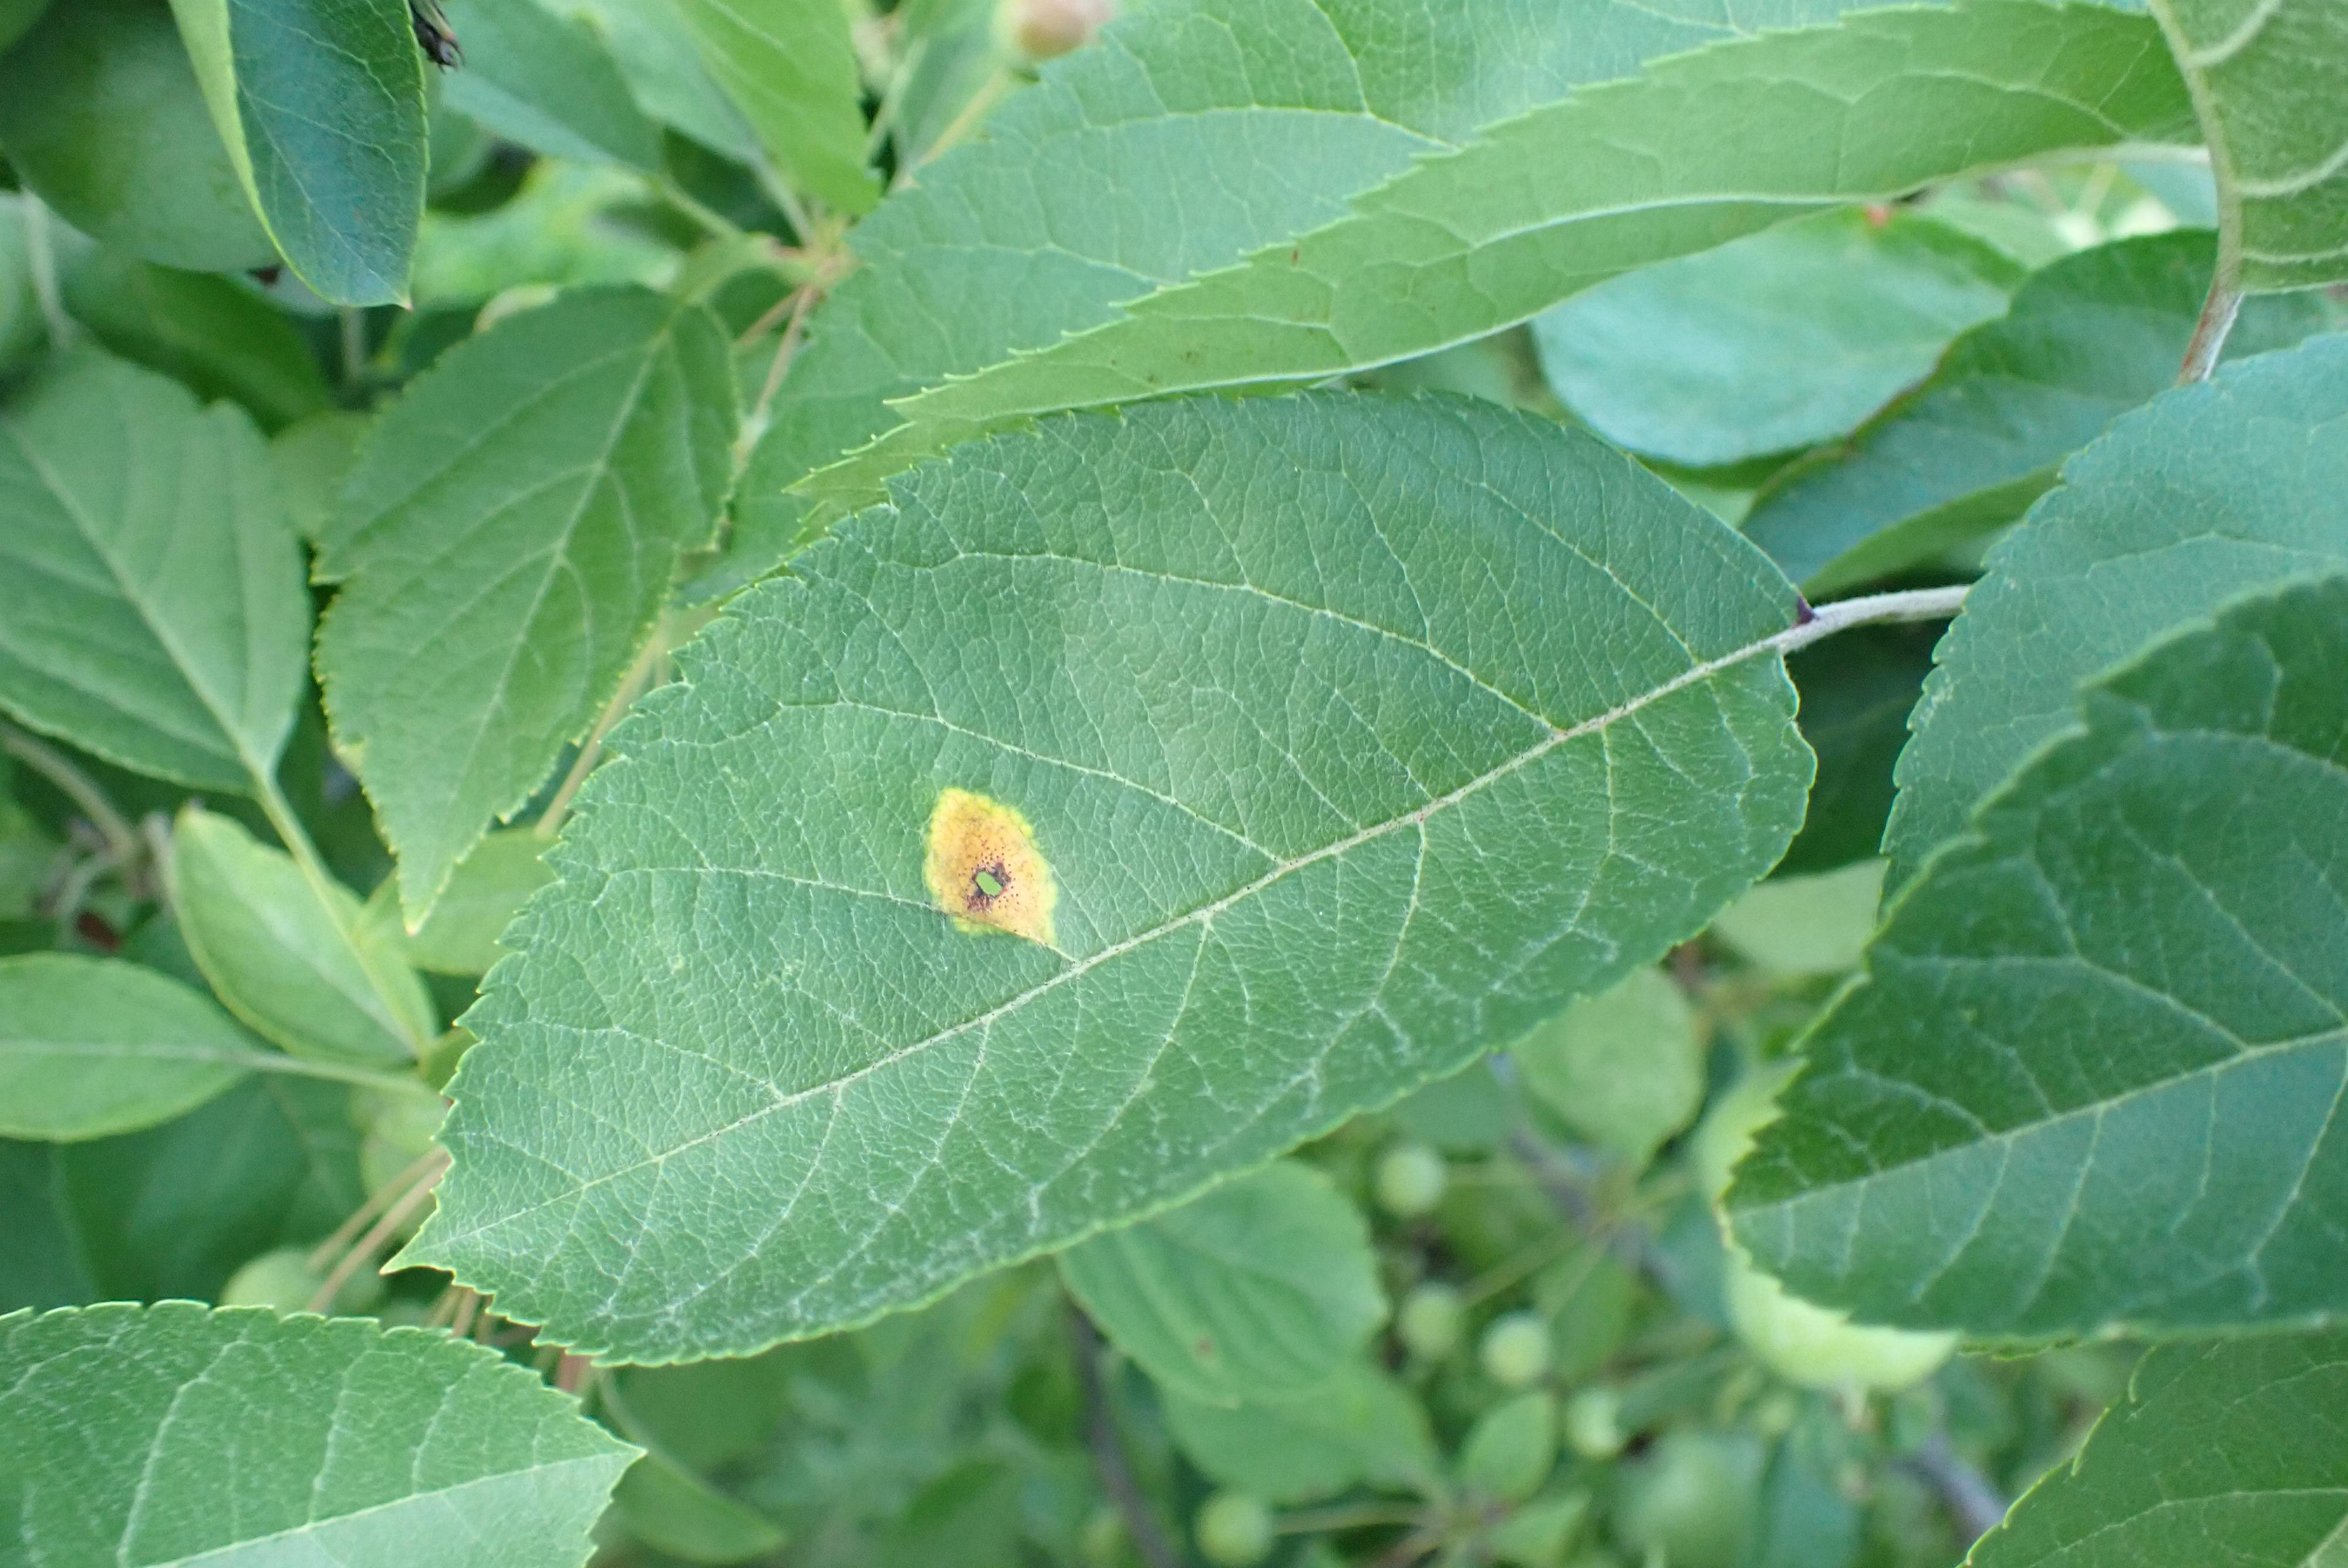

In [2]:
from PIL import Image
import IPython.display as display

image_path = r'C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Train\Rust\c09e35c7d027fa16.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))


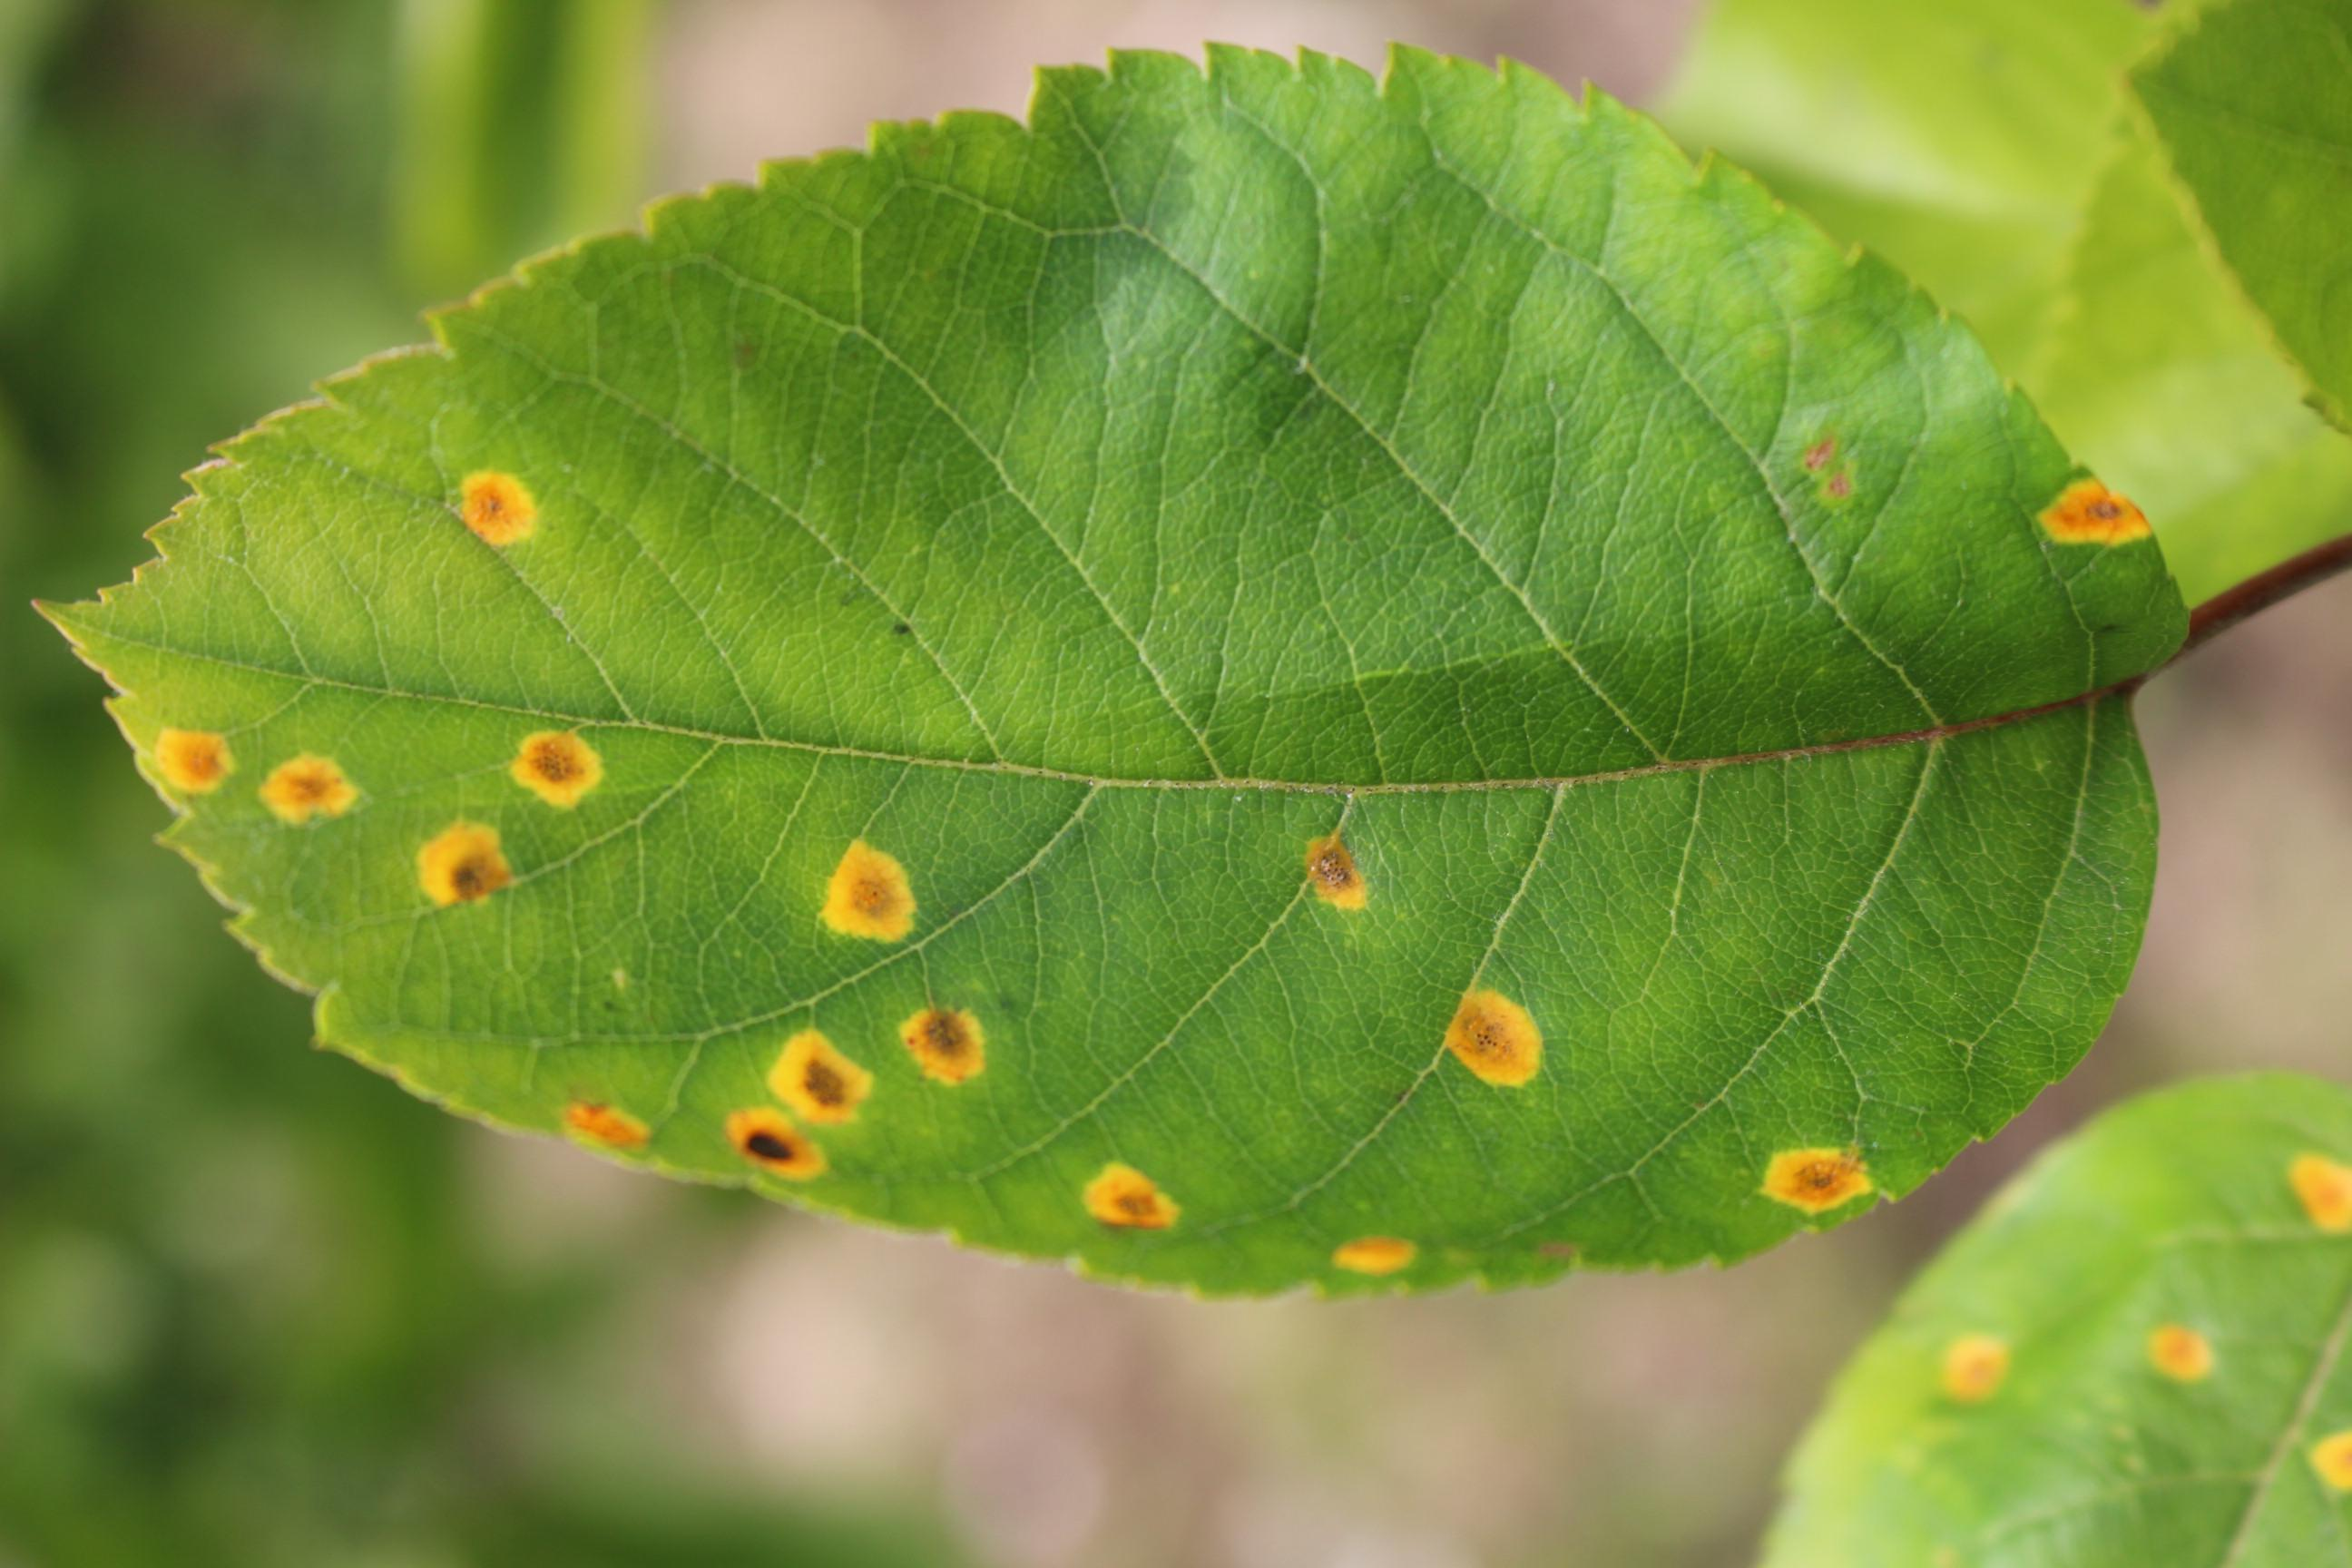

In [3]:
image_path = r'C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Train\Rust\80f09587dfc7988e.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(r"C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Train",
                                                 target_size=(225, 225),
                                                 batch_size=32,
                                                 class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r"C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Validation",
                                                      target_size=(225, 225),
                                                      batch_size=32,
                                                      class_mode='categorical')


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Input

# Define the input layer
input_layer = Input(shape=(225, 225, 3))

model = Sequential()
model.add(input_layer)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5


C:\Users\thisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.3879 - loss: 1.8849 - val_accuracy: 0.6000 - val_loss: 0.8405
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.6562 - loss: 0.7433 - val_accuracy: 0.7667 - val_loss: 0.5025
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.8458 - loss: 0.4177 - val_accuracy: 0.8167 - val_loss: 0.4265
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.8981 - loss: 0.2835 - val_accuracy: 0.8333 - val_loss: 0.4191
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.9300 - loss: 0.2178 - val_accuracy: 0.8333 - val_loss: 0.3754


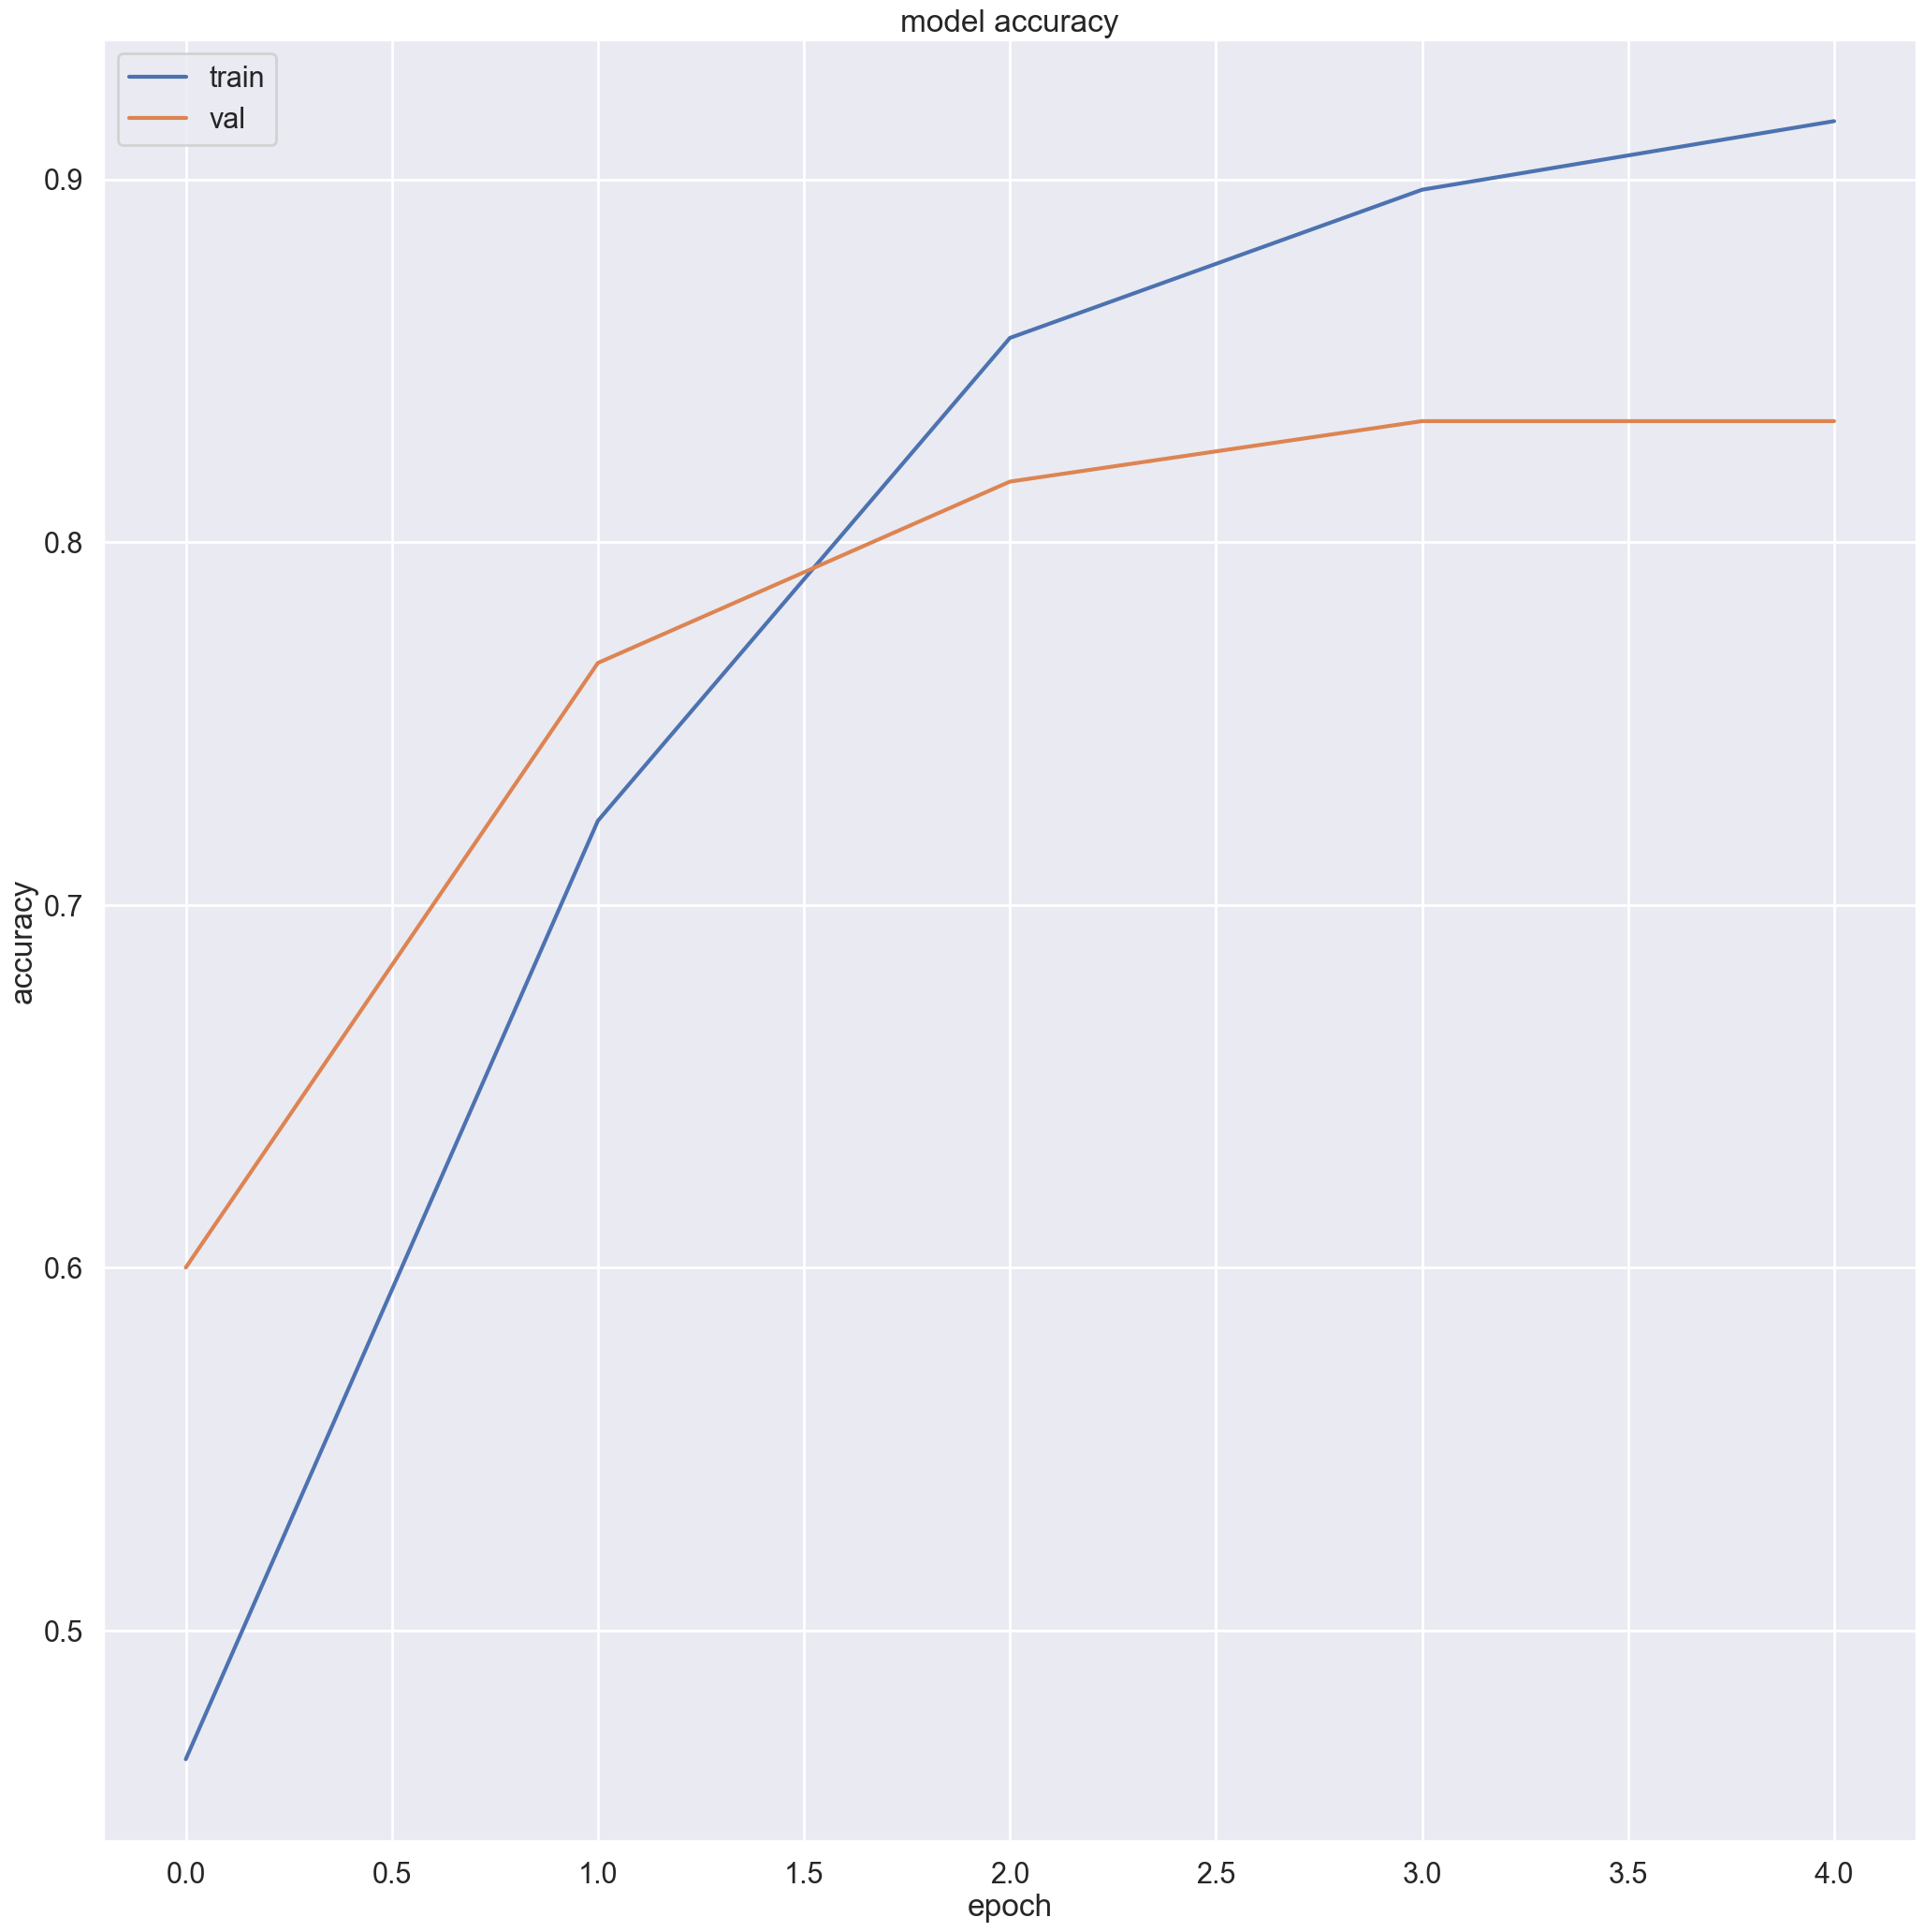

In [15]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
model.save("model.h5")


In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r'C:\Users\thisa\Desktop\DIP PROJECT\Plant_fungus\archive\Test\Rust\82f49a4a7b9585f1.jpg')

In [19]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


array([9.525481e-02, 5.572737e-04, 9.041879e-01], dtype=float32)

In [20]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [21]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
